In [1]:
## Parameters specific to where your folders are and your data
parameter_file = '../parameters/params.yaml'
import yaml
import sys
import os
with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

#data_folder = doc['data_folder']
#tissues = doc['tissues'].split(',')
#sys.path.append(doc['pipeline_path'])
ref_fa = doc['GENOME_FA']
#anno_gff=doc['annotation']
#mRNA_peak_file = doc["mRNA_peak_file"]
#tss_annotation = doc['tss_annotation']


import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from os.path import join
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm

from os.path import basename
##mpl.use('Agg')
#mpl.style.use('ggplot')
#mpl.style.use('fivethirtyeight')
#from Homer import *

homer_path =  "/data2/resources/software/homer/v4.11_10242019/bin/"
os.environ['PATH'] = f"{homer_path}:{os.environ['PATH']}"
!which homer

/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:7: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  import sys


/data2/resources/software/homer/v4.11_10242019/bin//homer


In [2]:
from tss.visualize import plot_tss_results
from tss.visualize.fig_utils import helper_save

params {'PREFIX': 'ncbi_pice_103', 'ROOT_DIR': '/data/isshamie/TSS/', 'DATA_DIR': '/data/isshamie/TSS/NCBI_PICR_103_Processed/', 'DATA_PROCESSED_DIR': '/data/isshamie/TSS/TSS/data/processed/', 'SUPPLEMENTAL_DIR': '/data/isshamie/TSS/Analysis/supplemental/', 'PIPELINE': '/data/isshamie/TSS/tss', 'GENOME_DIR': '/data/isshamie/genome', 'GENOME_FA': '/data/isshamie/genome/picr.fa', 'GENOME_GFF3': '/data/isshamie/genome/updated_final_sort.gff3', 'GENOME_GTF': '/data/isshamie/genome/updated_final_sort.gtf', 'TISSUES': 'BMDM1hKLA,BMDMwt,Brain,FemaleReproductive,Heart,Intestine,', 'META_FILE': '/data/isshamie/TSS/TSS/parameters/raw_metaSamples.tsv'}
fig_utils from mplh


# Input

In [3]:
anno="GCF"
txn_df = join(anno,"gene_centric_tss","txn_df_tissues.p")
gene_df = join(anno,"gene_centric_tss","gene_df_tissues.p")

## Output

In [4]:
os.chdir(doc["results"])
outdir = "tss_per_landmark/"
if not os.path.exists(outdir):
    os.mkdir(outdir)

outdir = join(outdir,anno)
if not os.path.exists(outdir):
    os.mkdir(outdir)

## peak bins -1kb:+1kb, no introns

# Txn

Number of SS
0    15052
1    13066
2     5507
3     1616
4      369
Name: hasGene, dtype: int64
Number of genes with greater than 10 peaks: 0
Percent identified:  0.5781271896633874


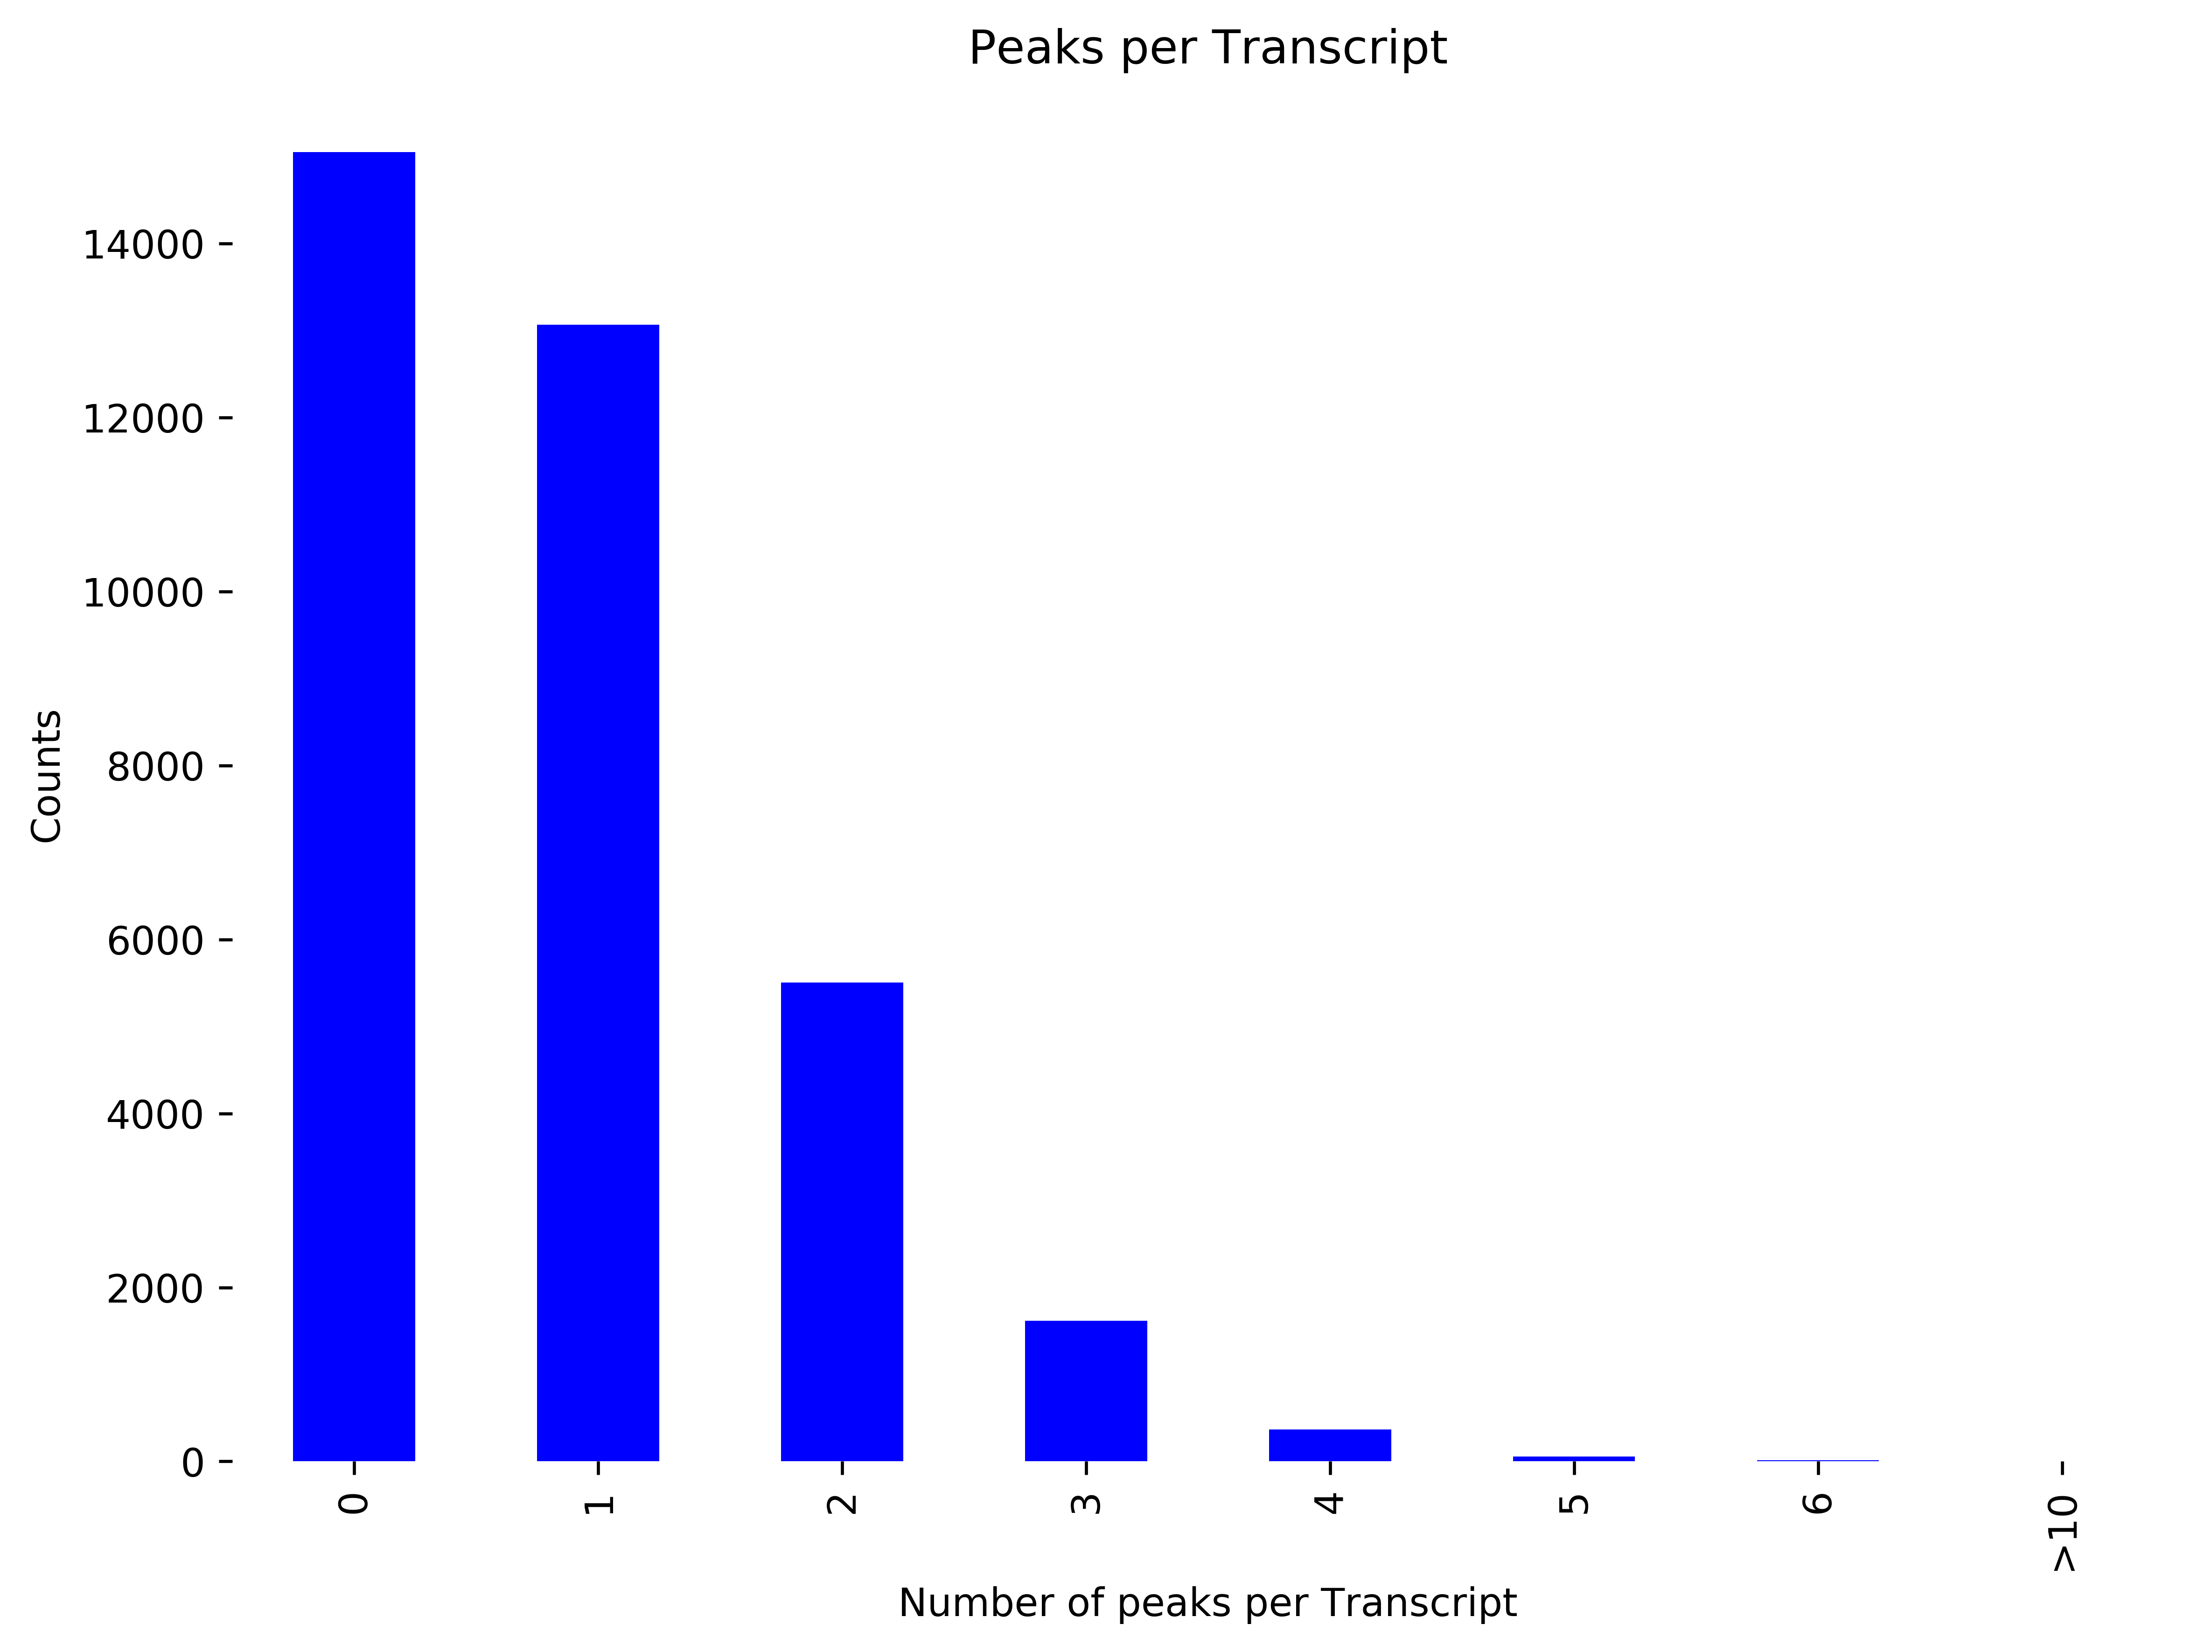

In [5]:
f_in = txn_df
f_save = join(outdir,'txn')
landmark_name = 'Transcript'

plot_tss_results.plot_peaks_per_landmark(f_in,landmark_name,f_save=join(outdir,"number_of_peaks_per_mrna"))

# Gene

Number of SS
0    6079
1    6811
2    4646
3    2202
4     935
Name: hasGene, dtype: int64
Number of genes with greater than 10 peaks: 15
Percent identified:  0.7157619114415299


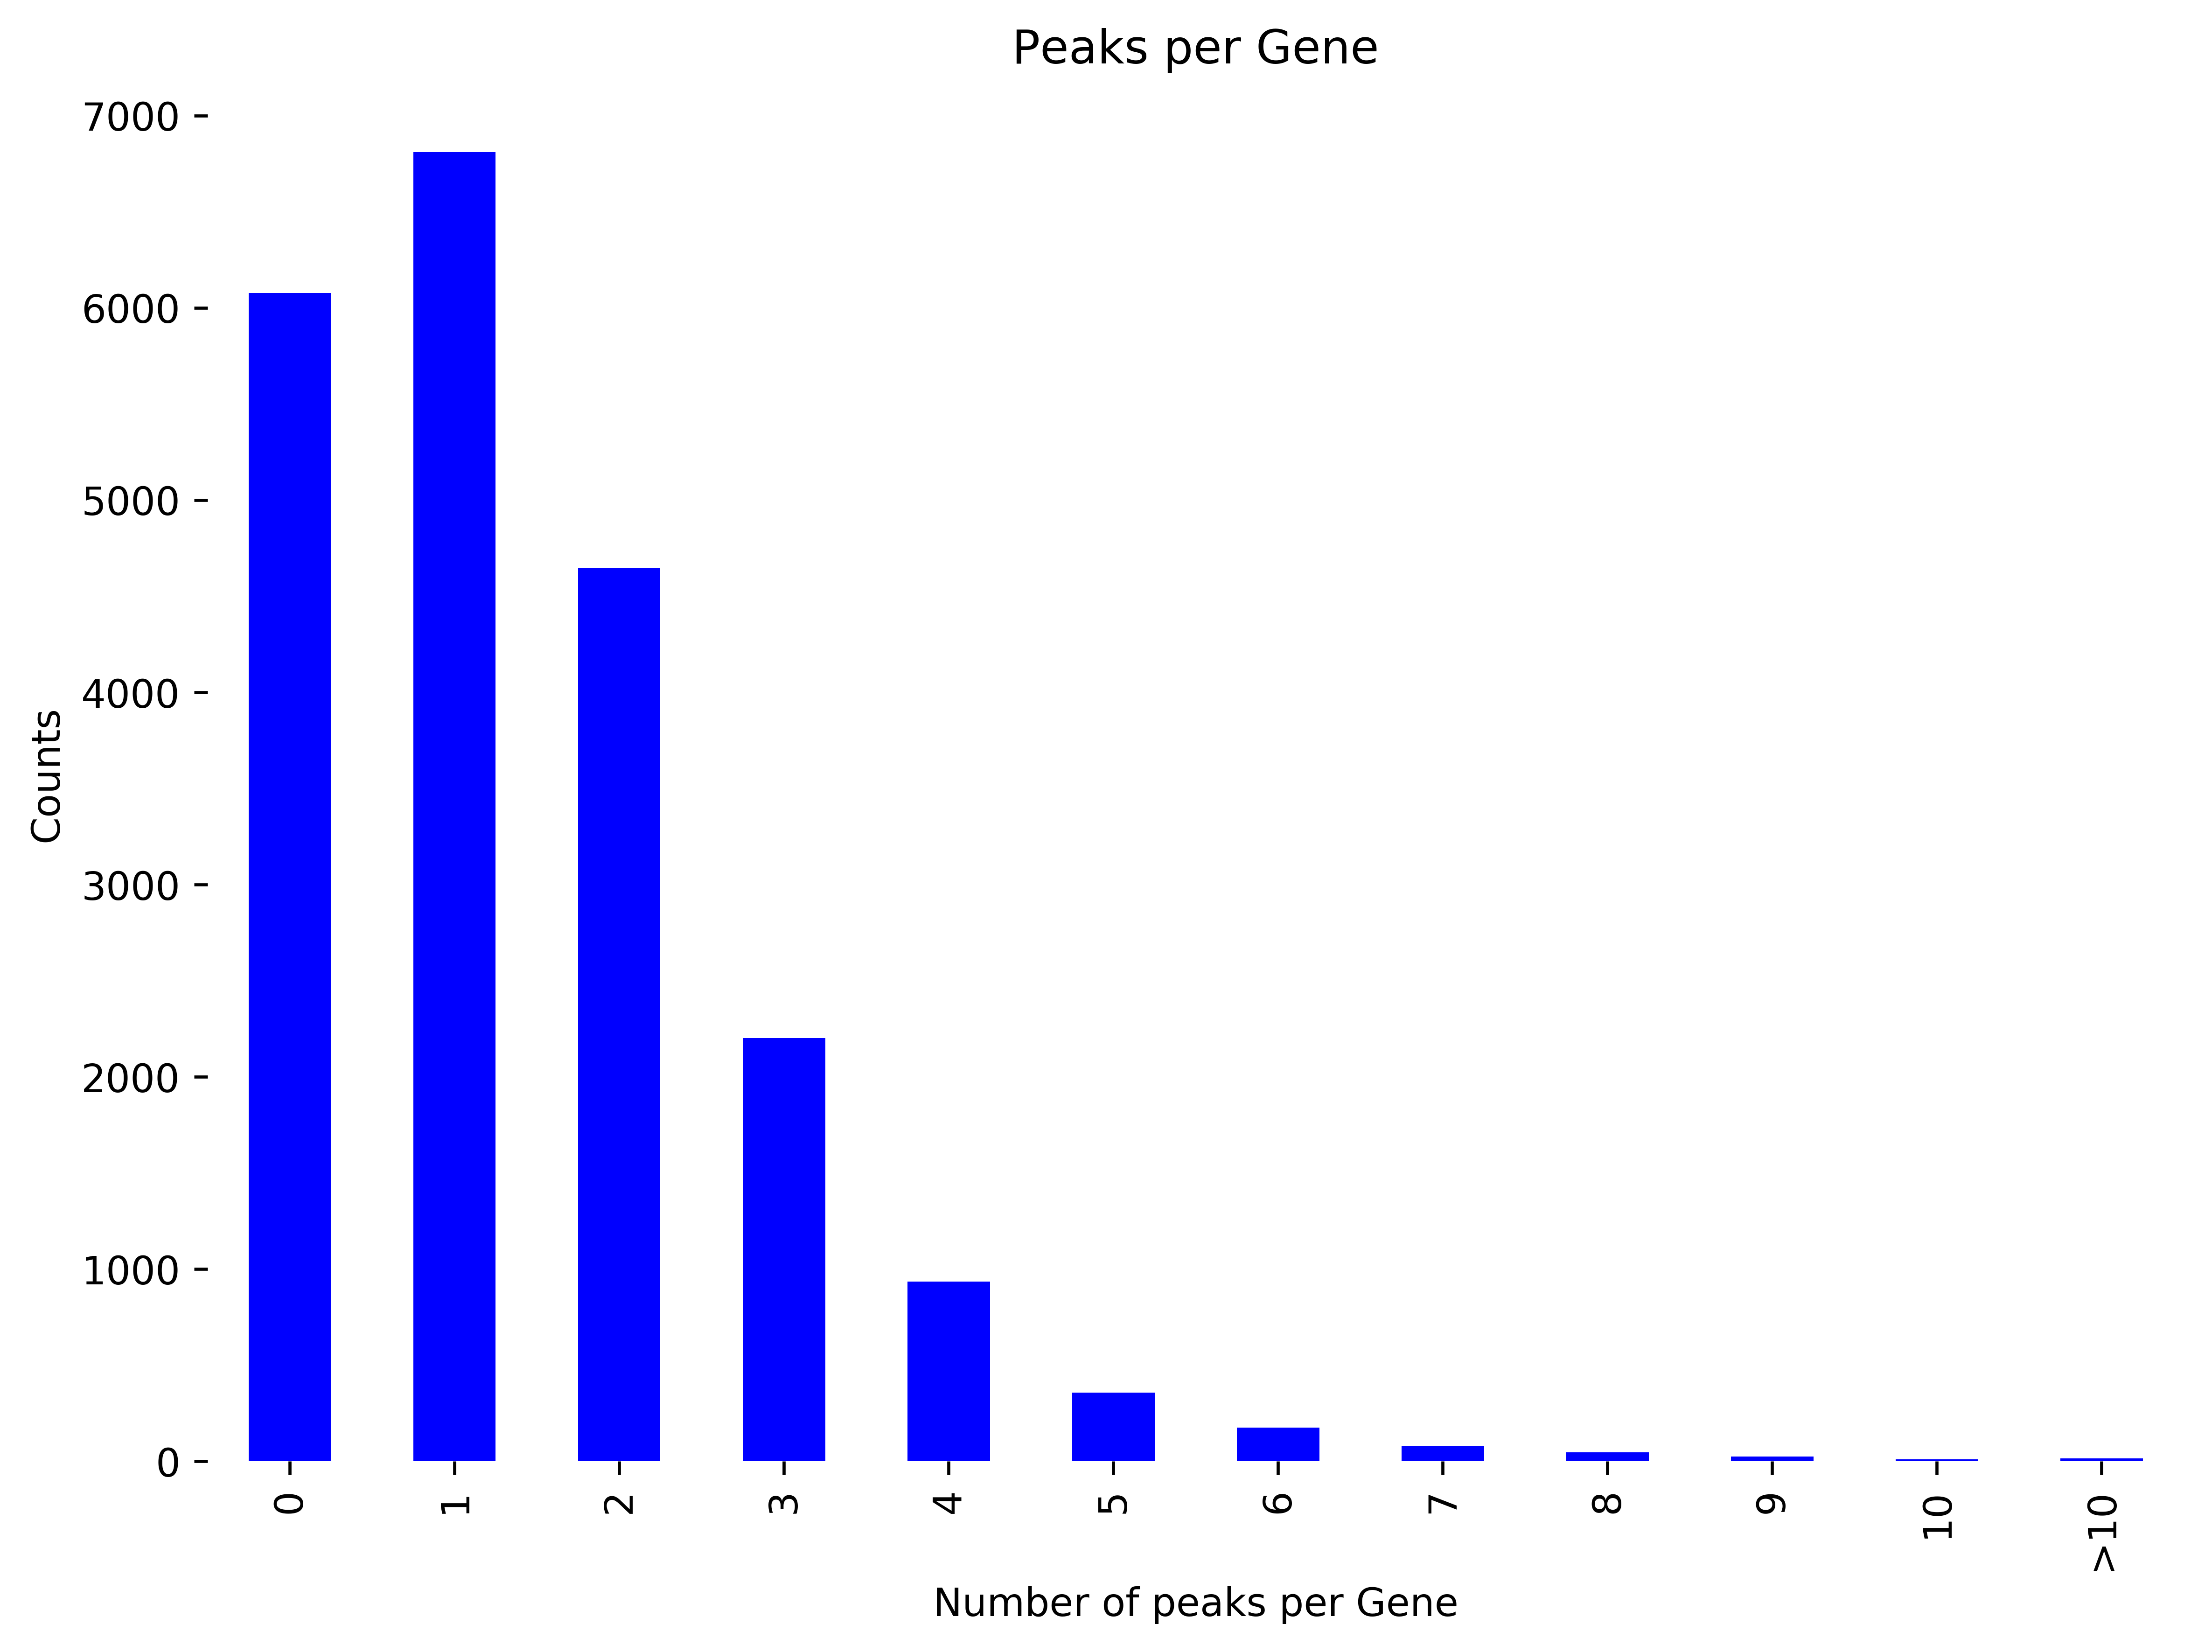

In [6]:
f_in = gene_df
f_save = join(outdir,gene_df)
landmark_name = 'Gene'

plot_tss_results.plot_peaks_per_landmark(f_in,landmark_name,f_save=join(outdir,"number_of_peaks_per_gene"))

## Number of tissues seen in 

In [7]:
len(doc["global"]["TISSUES"])

13

In [8]:
doc["global"]["TISSUES"]

['BMDM1hKL',
 'BMDMwt',
 'Brain',
 'FemaleReproductive',
 'Heart',
 'Kidney',
 'Liver',
 'Lung',
 'MiscOrgans',
 'Muscle',
 'Pancreas',
 'Spleen',
 'CHO']

In [5]:
gene = pickle.load(open(gene_df,'rb'))


In [9]:
merge_dict = {"BMDMwt": "BMDM", "BMDM1hKLA": "BMDM"}
tissues = doc["global"]["TISSUES"]
plot_tss_results.merge_tissues(tissues=doc["global"]["TISSUES"], tissues_merge=merge_dict)

tissues_collapse {'Muscle', 'BMDM', 'Heart', 'Liver', 'Pancreas', 'Kidney', 'CHO', 'FemaleReproductive', 'Lung', 'Spleen', 'Brain', 'MiscOrgans'}


['Muscle',
 'BMDM',
 'Heart',
 'Liver',
 'Pancreas',
 'Kidney',
 'CHO',
 'FemaleReproductive',
 'Lung',
 'Spleen',
 'Brain',
 'MiscOrgans']

## Number of tissues for each gene

/home/isshamie/software/anaconda2/envs/TSS/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


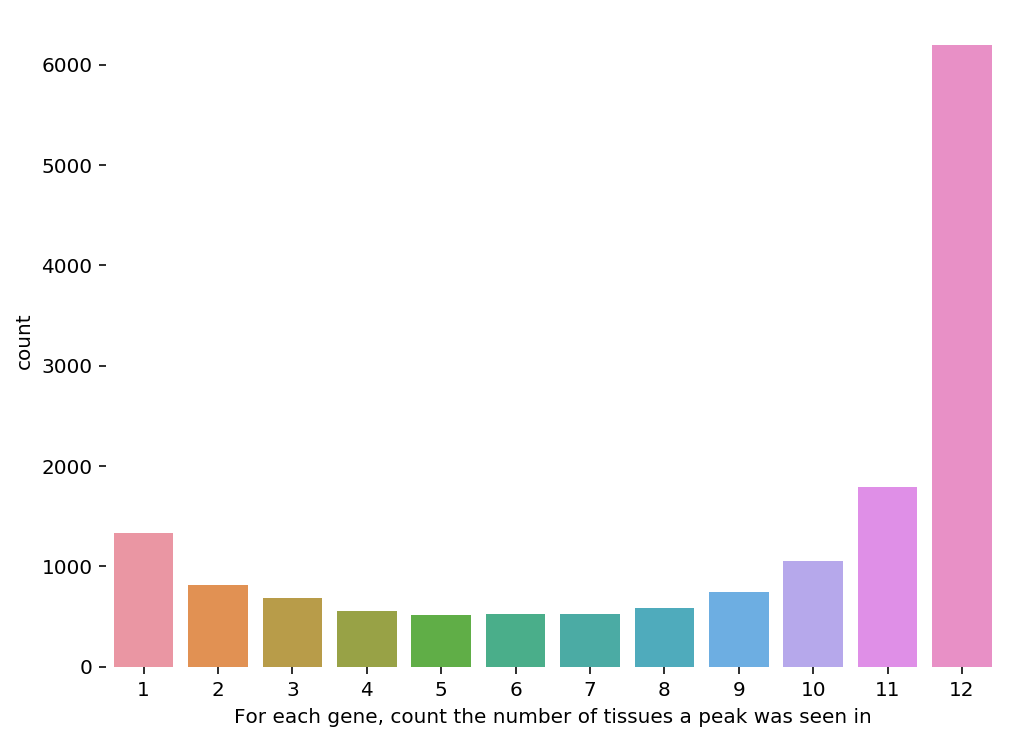

In [20]:
gene = pickle.load(open(gene_df,'rb'))
gene["Number Tissues"] = 0

for ind, val in gene[gene["Tissues"]!=""].iterrows():
    curr_ts = val["Tissues"].split(",")
    if curr_ts[0] == "":
        continue
    curr_ts = plot_tss_results.merge_tissues(curr_ts,merge_dict )
    #print(curr_ts)
    gene.at[ind, "Number Tissues"] = len(curr_ts)
    
    
x = sns.countplot(gene[gene["Tissues"]!=""]["Number Tissues"])
#sns.countplot(gene[gene["Tissues"]!=""]["Tissues"].apply((lambda x: len(x.split(',')))))
plt.xlabel("For each gene, count the number of tissues a peak was seen in")
helper_save(join(outdir,"number_of_tissues_per_gene"))
gene.groupby("Number Tissues").size().to_csv(join(outdir,"number_of_tissues_per_gene.csv"))

In [19]:
gene.groupby("Number Tissues").size()


Number Tissues
0     6079
1     1333
2      809
3      687
4      555
5      511
6      523
7      523
8      584
9      746
10    1054
11    1791
12    6192
dtype: int64

In [21]:
outdir

'tss_per_landmark/GCF'